## realestate price predictor

# Step 1 reading and understanding 

In [1]:
import pandas as pd

In [2]:
housing=pd.read_csv("data.csv")

In [3]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B 1000,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
housing['CHAS'].value_counts()

0    471
1     35
Name: CHAS, dtype: int64

In [5]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       502 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B 1000   506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [6]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B 1000,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,502.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.283968,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.704363,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


#  Step 2 Data Analysis

In [7]:
%matplotlib inline

In [8]:
import matplotlib as plt

array([[<AxesSubplot:title={'center':'CRIM'}>,
        <AxesSubplot:title={'center':'ZN'}>,
        <AxesSubplot:title={'center':'INDUS'}>,
        <AxesSubplot:title={'center':'CHAS'}>],
       [<AxesSubplot:title={'center':'NOX'}>,
        <AxesSubplot:title={'center':'RM'}>,
        <AxesSubplot:title={'center':'AGE'}>,
        <AxesSubplot:title={'center':'DIS'}>],
       [<AxesSubplot:title={'center':'RAD'}>,
        <AxesSubplot:title={'center':'TAX'}>,
        <AxesSubplot:title={'center':'PTRATIO'}>,
        <AxesSubplot:title={'center':'B 1000'}>],
       [<AxesSubplot:title={'center':'LSTAT'}>,
        <AxesSubplot:title={'center':'MEDV'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

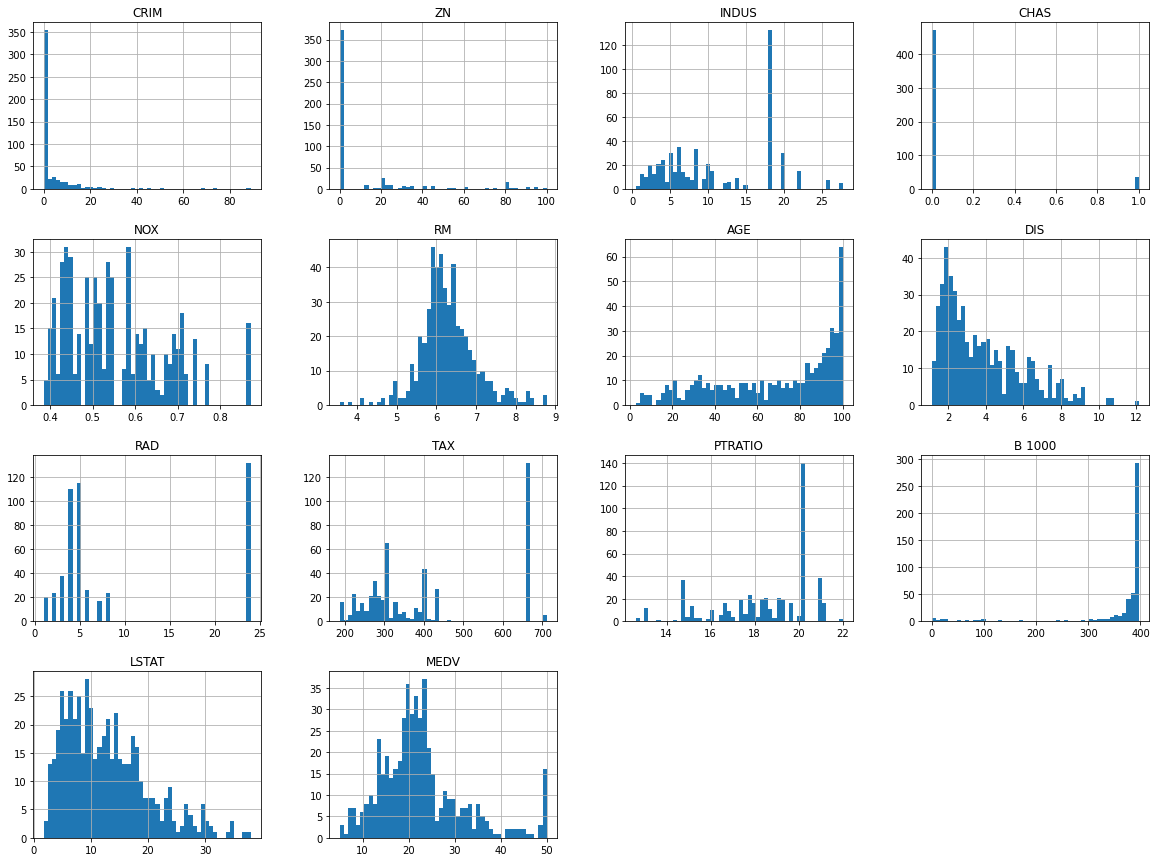

In [9]:
housing.hist(bins=50, figsize=(20,15))

# Step 3 training and testing DataSet

In [10]:
    '''
    import numpy as np
    def split_training_and_testing(data, test_ratio):
    np.random.seed(75)
    shuffle=np.random.permutation(len(data))
    test_set_size=int(len(data)*test_ratio)
    test_indicates=shuffle[:test_set_size]
    train_indicates=shuffle[test_set_size:]
    return data.iloc[train_indicates], data.iloc[test_indicates]'''

'\nimport numpy as np\ndef split_training_and_testing(data, test_ratio):\nnp.random.seed(75)\nshuffle=np.random.permutation(len(data))\ntest_set_size=int(len(data)*test_ratio)\ntest_indicates=shuffle[:test_set_size]\ntrain_indicates=shuffle[test_set_size:]\nreturn data.iloc[train_indicates], data.iloc[test_indicates]'

In [11]:
#train_set,test_set= split_training_and_testing(housing,0.15)

In [12]:
#print(f"row in train set is {len(train_set)}\n rows in test set is {len(test_set)}")

In [13]:
from sklearn.model_selection import train_test_split
train_set,test_set=train_test_split(housing,test_size=0.15, random_state=42)
print(len(train_set),len(test_set))

430 76


In [14]:
from sklearn.model_selection import StratifiedShuffleSplit
split=StratifiedShuffleSplit(n_splits=1,test_size=0.15,random_state=42)
for train_index,test_index in split.split(housing,housing['CHAS']):
    strat_train_set=housing.loc[train_index]
    strat_test_set=housing.loc[test_index]

In [15]:
strat_test_set['CHAS'].value_counts()

0    71
1     5
Name: CHAS, dtype: int64

## Step 4 looking for coorelation

In [16]:
corr_matrix=housing.corr()

In [17]:
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.694957
ZN         0.360445
B 1000     0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: MEDV, dtype: float64

array([[<AxesSubplot:xlabel='MEDV', ylabel='MEDV'>,
        <AxesSubplot:xlabel='RM', ylabel='MEDV'>,
        <AxesSubplot:xlabel='TAX', ylabel='MEDV'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='MEDV'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='RM'>,
        <AxesSubplot:xlabel='RM', ylabel='RM'>,
        <AxesSubplot:xlabel='TAX', ylabel='RM'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='RM'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='TAX'>,
        <AxesSubplot:xlabel='RM', ylabel='TAX'>,
        <AxesSubplot:xlabel='TAX', ylabel='TAX'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='TAX'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='RM', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='TAX', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='LSTAT'>]], dtype=object)

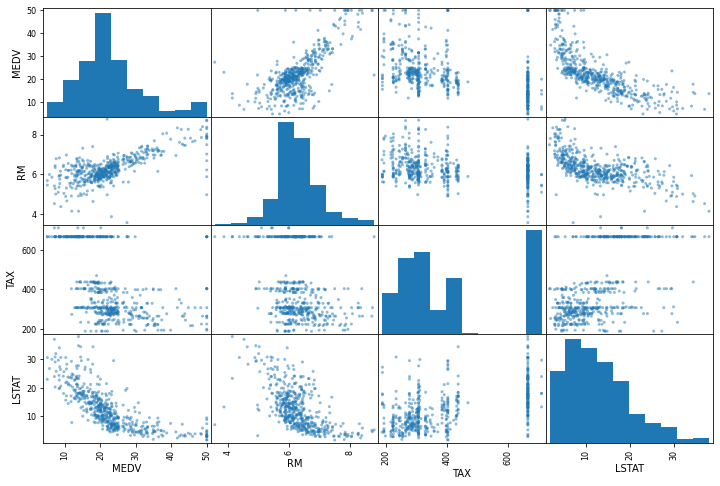

In [18]:
from pandas.plotting import scatter_matrix
attributes= ["MEDV","RM","TAX","LSTAT"]
scatter_matrix(housing[attributes],figsize=(12,8))

<AxesSubplot:xlabel='RM', ylabel='MEDV'>

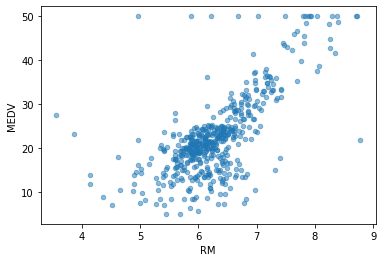

In [19]:
housing.plot(kind="scatter",x='RM',y='MEDV',alpha=0.5)

## Step 5 try out attributes contributions

In [20]:
housing['TAXRM']=housing['TAX']/housing['RM']
housing['TAXRM']

0      45.019011
1      37.688834
2      33.681280
3      31.723350
4      31.061984
         ...    
501    41.407553
502    44.607843
503    39.134174
504    40.182514
505    45.273632
Name: TAXRM, Length: 506, dtype: float64

In [21]:
corr_matrix=housing.corr()
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.694957
ZN         0.360445
B 1000     0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
TAXRM     -0.536633
LSTAT     -0.737663
Name: MEDV, dtype: float64

<AxesSubplot:xlabel='TAXRM', ylabel='MEDV'>

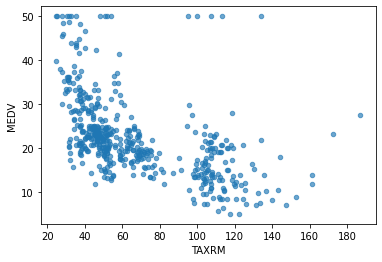

In [22]:
housing.plot(kind="scatter",x='TAXRM',y='MEDV',alpha=0.65)

In [23]:
housing=strat_train_set.drop("MEDV",axis=1)
housing_labels= strat_train_set["MEDV"].copy()

In [24]:
a=housing.dropna(subset='RM')#OPTION 2
a.shape

(427, 13)

In [25]:
b=housing.drop('RM',axis=1) #option2
b.shape

(430, 12)

In [26]:
median=housing['RM'].median()
#housing['RM'].fillna(median) #option3 done before training and testing

In [27]:
import numpy as np
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
imputer.fit(housing)

SimpleImputer(strategy='median')

In [28]:
x=imputer.transform(housing)

In [29]:
housing_tr = pd.DataFrame(x,columns=housing.columns)

In [30]:
housing_tr.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B 1000,LSTAT
count,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000
mean,3.487143,10.858140,11.283837,0.069767,0.555937,6.280577,68.599302,3.769823,9.651163,410.630233,18.451628,353.156581,12.761977
std,7.914511,22.450118,6.863975,0.255051,0.115707,0.711712,28.288095,2.090027,8.686682,168.739190,2.121943,96.337255,7.186006
min,0.006320,0.000000,0.740000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.085013,0.000000,5.320000,0.000000,0.453000,5.879250,43.875000,2.066825,4.000000,281.750000,17.400000,373.105000,6.950000
50%,0.274475,0.000000,9.900000,0.000000,0.538000,6.211000,77.700000,3.190950,5.000000,334.500000,18.900000,390.945000,11.445000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.628000,93.975000,5.112625,24.000000,666.000000,20.200000,395.620000,17.107500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


## Step 6 Creating a Pipelines

In [31]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline ([
    ('imputer' , SimpleImputer(strategy='median')),
# and all others needed
    ('std_scaler', StandardScaler()),
])

In [32]:
housing_num_tr = my_pipeline.fit_transform(housing)

In [33]:
housing_num_tr

array([[-0.40833261, -0.48421961,  1.5469924 , ...,  1.29672341,
         0.40481527,  0.61691861],
       [ 0.28386225, -0.48421961,  0.99419104, ...,  0.82490833,
         0.43775884, -0.80137373],
       [-0.25183386, -0.48421961,  1.21006071, ..., -1.77007464,
        -0.12009936,  0.07217175],
       ...,
       [-0.43075806, -0.48421961, -1.22430729, ..., -0.21308486,
         0.41957233, -1.28063951],
       [ 0.16004789, -0.48421961,  0.99419104, ...,  0.82490833,
        -3.1409306 ,  0.74788077],
       [ 0.03641063, -0.48421961,  0.99419104, ...,  0.82490833,
        -3.44137174,  0.61134575]])

## Step 7 selecting desire model

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor()
#model=DecisionTreeRegressor()
#model=LinearRegression()
model.fit(housing_num_tr,housing_labels)

RandomForestRegressor()

In [35]:
some_data=housing.iloc[:5]

In [36]:
some_labels=housing_labels.iloc[:5]

In [37]:
prepared_data=my_pipeline.transform(some_data)

In [38]:
model.predict(prepared_data)

array([16.196, 27.037, 18.763, 27.699, 21.435])

In [39]:
list(some_labels)

[16.2, 25.0, 19.6, 26.6, 20.1]

## Step 8 Evaluating the model

In [40]:
from sklearn.metrics import mean_squared_error
housing_prediction=model.predict(housing_num_tr)
mse=mean_squared_error(housing_labels,housing_prediction)
rmse=np.sqrt(mse)

In [41]:
rmse

1.2293409124688586

## Step 8a USING BETTER EVALUATION TECHNIQUE - CROSS VALIDATION

In [42]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(model,housing_num_tr,housing_labels,scoring="neg_mean_squared_error", cv=10)
rmse_score=np.sqrt(-scores)

In [43]:
rmse_score

array([3.04456823, 2.88847148, 2.9691547 , 2.68925502, 3.05519513,
       2.8249369 , 5.20593727, 2.84493587, 3.85416822, 3.40612383])

In [44]:
def print_scores(scores):
    print(f"scores: {scores} \nmean: {scores.mean()} \nStandard Deviation: {scores.std()}")

In [45]:
print_scores(rmse_score)

scores: [3.04456823 2.88847148 2.9691547  2.68925502 3.05519513 2.8249369
 5.20593727 2.84493587 3.85416822 3.40612383] 
mean: 3.278274665141589 
Standard Deviation: 0.7180535180434149


## Last Step Model Saving

In [46]:
from joblib import dump, load
dump(model, 'housing_data.joblib')

['housing_data.joblib']

## Part 2 Model Testing

In [47]:
x_test= strat_test_set.drop("MEDV",axis=1)
y_test=strat_test_set["MEDV"].copy()
X_test_prepared=my_pipeline.transform(x_test)
final_predictions=model.predict(X_test_prepared)
final_mse=mean_squared_error(y_test, final_predictions)
final_rmse=np.sqrt(final_mse)

In [48]:
final_rmse

2.894328946859976